For extracting audio from video

In [16]:
#file_path = "D:\Helpful folder\for SRIP IITG"
#file_name = "video_record"
#file_format = ".mp4"

#path = file_path + "\\" + file_name + file_format
#path = path.replace ("\\" , "\\\\")

path = "D:\\Helpful folder\\for SRIP IITG\\video_record.mp4"

In [14]:
!pip install moviepy

     ---------------------------------------- 0.0/388.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/388.3 kB ? eta -:--:--
     -- ---------------------------------- 30.7/388.3 kB 262.6 kB/s eta 0:00:02
     ------- ----------------------------- 81.9/388.3 kB 508.4 kB/s eta 0:00:01
     --------------------------- ---------- 276.5/388.3 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 388.3/388.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for decorator<5.0,>=4.0.2 from https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for proglog<=1.0.0 from https://files.pythonhosted.org/packages/8b/f5/cab5cf6a540c31f5099043de0ae43990fd9cf66f75ecb5e9f254a4e4d4ee/proglog-0.1.10-py3-none-any.whl.metadata
  Obt

   -------------------- ------------------- 11.9/22.6 MB 2.4 MB/s eta 0:00:05
   --------------------- ------------------ 12.0/22.6 MB 2.5 MB/s eta 0:00:05
   --------------------- ------------------ 12.1/22.6 MB 2.5 MB/s eta 0:00:05
   --------------------- ------------------ 12.2/22.6 MB 2.5 MB/s eta 0:00:05
   --------------------- ------------------ 12.3/22.6 MB 2.4 MB/s eta 0:00:05
   ---------------------- ----------------- 12.4/22.6 MB 2.4 MB/s eta 0:00:05
   ---------------------- ----------------- 12.5/22.6 MB 2.4 MB/s eta 0:00:05
   ---------------------- ----------------- 12.6/22.6 MB 2.4 MB/s eta 0:00:05
   ---------------------- ----------------- 12.7/22.6 MB 2.4 MB/s eta 0:00:05
   ---------------------- ----------------- 12.9/22.6 MB 2.4 MB/s eta 0:00:05
   ---------------------- ----------------- 12.9/22.6 MB 2.4 MB/s eta 0:00:05
   ----------------------- ---------------- 13.1/22.6 MB 2.4 MB/s eta 0:00:04
   ----------------------- ---------------- 13.2/22.6 MB 2.4 MB/

In [20]:
from moviepy.editor import VideoFileClip

def extract_audio_data(video_file):
    video = VideoFileClip(video_file)
    audio = video.audio
    audio_header = {
        "duration": audio.duration,
        "sample_rate": audio.fps,
        "channels": audio.nchannels,
    }
    audio_data = audio.to_soundarray()
    return audio_header, audio_data

# Example usage
audio_header, audio_data = extract_audio_data(video_file = path)
print("Audio Header:", audio_header)
print("Audio Data:", audio_data)

Audio Header: {'duration': 16.51, 'sample_rate': 44100, 'channels': 2}
Audio Data: [[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 ...
 [-0.00106812 -0.00106812]
 [-0.00198364 -0.00198364]
 [-0.00299072 -0.00299072]]


Hence, the sample rate is 44.1 kHz, which corresponds to a 16 bit audio file

In [21]:
audio_data.shapes

(728091, 2)

In [23]:
print (audio_data[-10:])

[[-0.00427246 -0.00427246]
 [-0.00396729 -0.00396729]
 [-0.0020752  -0.0020752 ]
 [-0.00167847 -0.00167847]
 [-0.00268555 -0.00268555]
 [-0.00286865 -0.00286865]
 [-0.00177002 -0.00177002]
 [-0.00106812 -0.00106812]
 [-0.00198364 -0.00198364]
 [-0.00299072 -0.00299072]]


The values in both the columns seems to remain same, hence, we remove one of the columns.

In [26]:
audio_data = audio_data [:,0]

Now, to plot the file

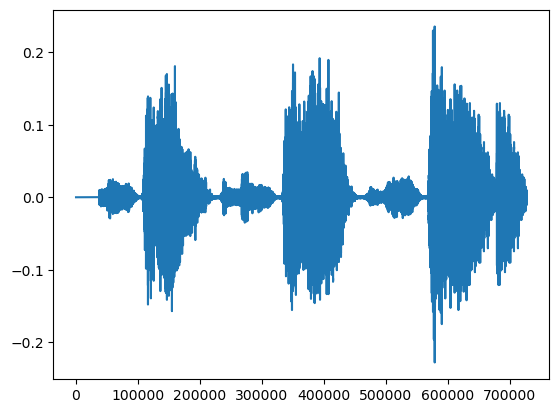

In [54]:
import matplotlib.pyplot as plt

plt.plot (audio_data)
plt.show ()

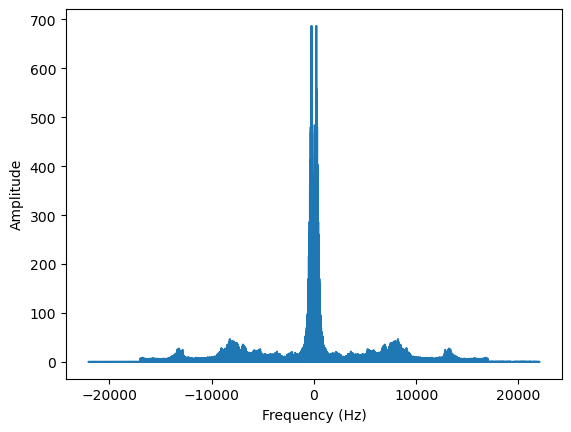

In [55]:
# to find the fourier transform,
import numpy as np

# Example usage
fft_audio = np.fft.fft (audio_data)
freqs = np.fft.fftfreq(len(audio_data)) * audio_header ["sample_rate"]

plt.plot(freqs, np.abs(fft_audio))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [56]:
len (fft_audio)

728091

In [127]:
# Now, to filter this signal, and perform reverse fourier transform
from scipy.signal import butter, filtfilt
import scipy.fftpack as fftpack

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff_freq, fs, order=5):
    b, a = butter_lowpass(cutoff_freq, fs, order=order)
    return filtfilt(b, a, data)

def apply_highpass_filter(data, cutoff_freq, fs, order=5):
    b, a = butter_highpass(cutoff_freq, fs, order=order)
    return filtfilt(b, a, data)

def apply_inverse_fft(fft_data):
    return fftpack.ifft(fft_data).real

# Example usage
# cutoff frequencies for low-pass and high-pass filters
lowpass_cutoff = 22000  # Hz
highpass_cutoff = 2000  # Hz
# Sample rate of the audio data
fs = 44100 

# Apply low-pass filter
filtered_audio = apply_lowpass_filter(fft_audio, lowpass_cutoff, fs)

# Apply high-pass filter
filtered_audio = apply_highpass_filter(filtered_audio, highpass_cutoff, fs)

# Perform inverse FFT to obtain new audio data
new_audio_data = apply_inverse_fft(filtered_audio)

In [128]:
len (new_audio_data)

728091

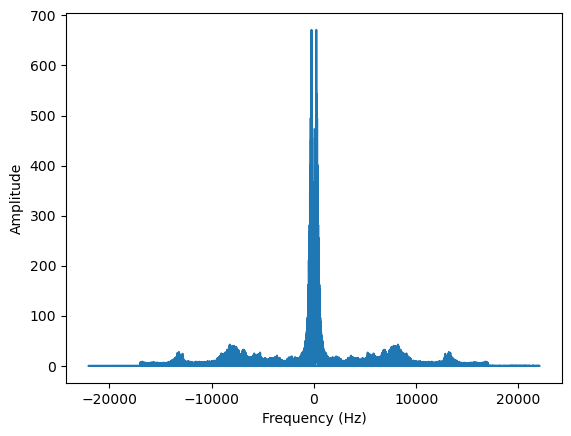

In [129]:
# to find the fourier transform,
import numpy as np

# Example usage
freqs = np.fft.fftfreq(len(audio_data)) * audio_header ["sample_rate"]

plt.plot(freqs, np.abs(filtered_audio))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

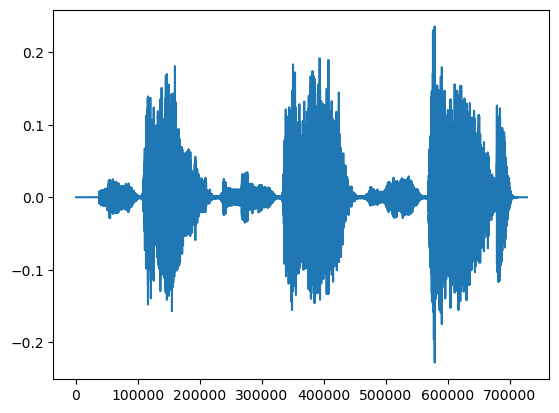

In [130]:
plt.plot (new_audio_data)
plt.show ()

Through trial and error and changing the low pass and high pass filter parameters, it seems the signal best retains its shape between frequencies of 2 kHz and 22 kHz. It would seem that higher frequencies are detected when exhaling, and lower ones when inhaling.